In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi

In [3]:
import QLEAuxV2_pub as qa

import importlib
importlib.reload(qa)

<module 'QLEAuxV2_pub' from '/home/jupyter-tatpong@kku.ac.th/Y2025/QIS/QLEAuxV2_pub.py'>

In [4]:
import random

# Grover

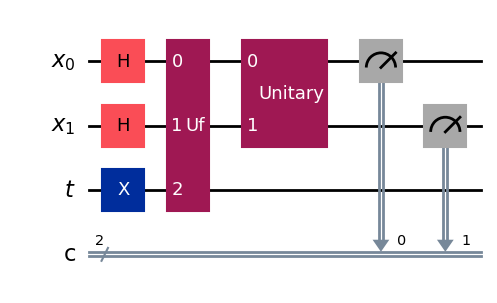

In [5]:
Ufz = qa.make_TMZ(TruthModels=("01", ), KBname='Uf', theta=np.pi)

x_qubit = QuantumRegister(2,'x')
t_qubit = QuantumRegister(1,'t')

cr = ClassicalRegister(2, 'c')

qc = QuantumCircuit(x_qubit, t_qubit, cr)


# Put input into superposition
qc.h([0, 1])

# y
qc.x(2)
# qc.h(2)

# Uf: f(x) @ y
qc.append(Ufz,[0,1,2])

# Inversion around mean
m = 4
A = 1/m * np.ones((m, m))
B = 2 * A - np.identity(m)
Bgate = qi.Operator(B)
Bgate.label = "2A - I"
qc.append(Bgate, [0,1])

qc.measure(x_qubit, cr)

# qc.h(2)
qc.draw('mpl')


{'01': 1024}


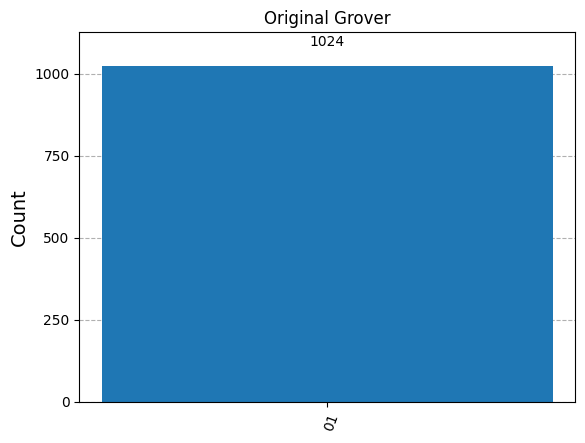

In [6]:
simulator = AerSimulator()
qc = transpile(qc, simulator)
job = simulator.run(qc)

result = job.result()

counts = result.get_counts(qc)

print(counts)
plot_histogram(counts, title='Original Grover')

# Eigenmarking

Add one more qubit: "minoritize" the all-winner $x$.

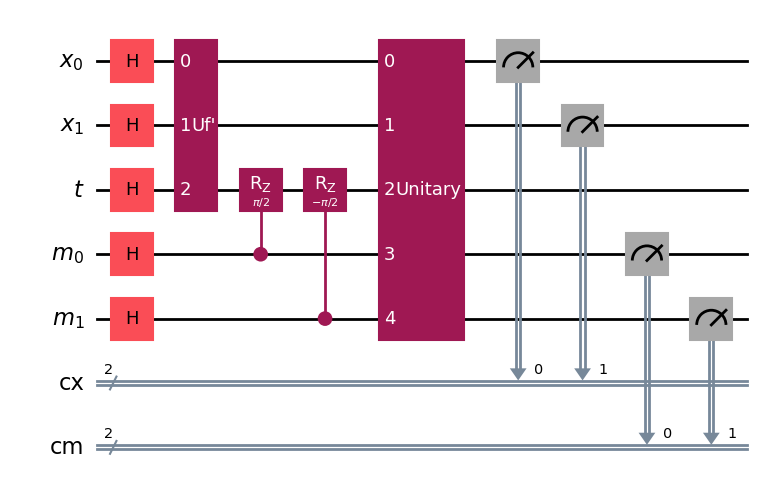

In [7]:
Ufz = qa.make_TMZ(TruthModels=("00", "01", "10", "11"), KBname="Uf'", theta=np.pi/2)

x_qubit = QuantumRegister(2,'x')
t_qubit = QuantumRegister(1,'t')
m_qubit = QuantumRegister(2,'m')

crx = ClassicalRegister(2, 'cx')
crm = ClassicalRegister(2, 'cm')

qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)

# Put input into superposition
# [3,4] is the extra qubit
qc.h([0, 1, 3, 4])

# y
qc.h(2)

# Uf: f(x) @ y
qc.append(Ufz,[0,1,2])

# [m0] @ y
qc.mcrz(np.pi/2, 3, 2)

# [m1] @ y
qc.mcrz(-np.pi/2, 4, 2)

# Inversion around mean
m = 32
A = 1/m * np.ones((m, m))
B = 2 * A - np.identity(m)
Bgate = qi.Operator(B)

qc.append(Bgate, [0,1,2,3,4])

qc.measure(x_qubit, crx)
qc.measure(m_qubit, crm)

qc.draw('mpl')


{'10 10': 3, '10 00': 2, '01 10': 141, '11 01': 36, '00 01': 49, '11 11': 50, '01 11': 155, '00 11': 53, '10 11': 3, '10 01': 3, '01 01': 161, '11 10': 53, '01 00': 168, '11 00': 41, '00 00': 52, '00 10': 54}


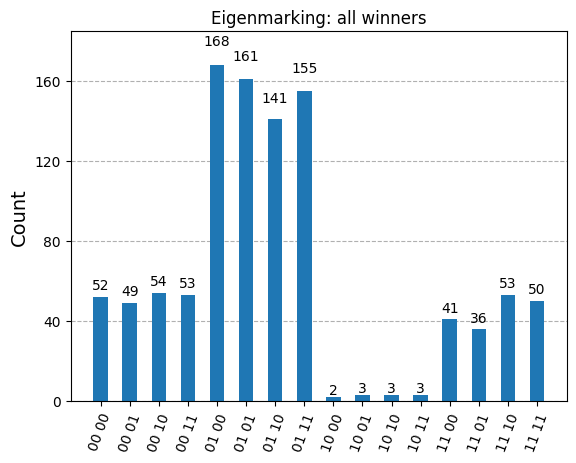

In [8]:
simulator = AerSimulator()
qc = transpile(qc, simulator)
job = simulator.run(qc)

result = job.result()

counts = result.get_counts(qc)

print(counts)
plot_histogram(counts, title='Eigenmarking: all winners')

## No winner

In [9]:
Ufz_W0 = qa.make_TMZ(TruthModels=("00", ), KBname='Uf', theta=0)
# For no winner case, Uf rotates phase by 0. 

TestCases = {'No winner': Ufz_W0}

Results = {}
for tc in TestCases.keys():

    Ufz = TestCases[tc]
 
    x_qubit = QuantumRegister(2,'x')
    t_qubit = QuantumRegister(1,'t')
    m_qubit = QuantumRegister(2,'m')
    
    crx = ClassicalRegister(2, 'cx')
    crm = ClassicalRegister(2, 'cm')
    
    qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)
    
    # Put input into superposition
    # [3,4] is the extra qubit
    qc.h([0, 1, 3, 4])
    
    # y
    qc.h(2)
    
    # Uf: f(x) @ y
    qc.append(Ufz,[0,1,2])
    
    # [m0] @ y
    qc.mcrz(np.pi/2, 3, 2)
    
    # [m1] @ y
    qc.mcrz(-np.pi/2, 4, 2)
    
    # Inversion around mean
    m = 32
    A = 1/m * np.ones((m, m))
    B = 2 * A - np.identity(m)
    Bgate = qi.Operator(B)
    
    qc.append(Bgate, [0,1,2,3,4])
    
    qc.measure(x_qubit, crx)
    qc.measure(m_qubit, crm)
    
    simulator = AerSimulator()
    qc = transpile(qc, simulator)

    # Acquire results
    Results[tc] = []
    for irep in range(40):
        job = simulator.run(qc)        
        result = job.result()
        
        counts = result.get_counts(qc)
        Results[tc].append(counts)


# np.save("EigenMark_win0.npy", Results)                


In [11]:
Results.keys()

dict_keys(['No winner'])

In [12]:
len(Results['No winner'])

40

In [13]:
Results['No winner'][0]

{'11 00': 40,
 '11 10': 24,
 '11 11': 35,
 '10 10': 93,
 '00 00': 37,
 '00 10': 25,
 '01 01': 101,
 '10 01': 91,
 '10 11': 89,
 '00 11': 26,
 '01 11': 97,
 '11 01': 31,
 '10 00': 102,
 '01 10': 91,
 '00 01': 37,
 '01 00': 105}

### Visualize results

In [14]:
qa.collectByState(Results['No winner'][:2])

{'11 00': [40, 33],
 '11 10': [24, 35],
 '11 11': [35, 27],
 '10 10': [93, 95],
 '00 00': [37, 27],
 '00 10': [25, 39],
 '01 01': [101, 98],
 '10 01': [91, 97],
 '10 11': [89, 97],
 '00 11': [26, 35],
 '01 11': [97, 103],
 '11 01': [31, 28],
 '10 00': [102, 80],
 '01 10': [91, 102],
 '00 01': [37, 28],
 '01 00': [105, 100]}

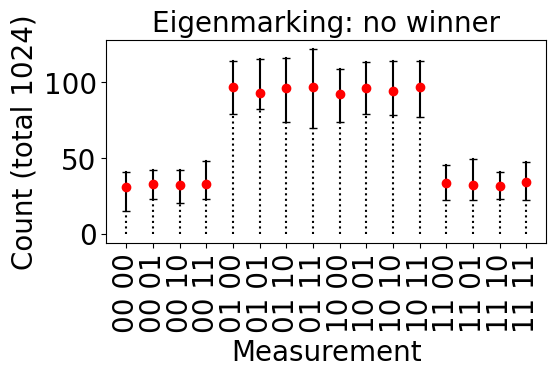

In [16]:
TCs = ['No winner']

plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # fontsize of the legend

nr, nc = 1, 1

fig, axes = plt.subplots(nrows=nr, ncols=nc)
fig.tight_layout(rect=[0.1, 0.1, nc, nr*0.75], h_pad=5, w_pad=2)

for i,tc in enumerate(TCs):

    StateCount = qa.collectByState(Results[tc])
    observ = list(StateCount.keys())
    observ.sort()

    plotmatx = np.zeros((0,4))
    plotmaty = np.zeros((0,4))
    for j,o in enumerate(observ):
        cmax =  np.max(StateCount[o])
        cmedian = np.median(StateCount[o])
        cmin =  np.min(StateCount[o])

        # Single plot
        plt.subplot(nr, nc, i+1)
        plt.plot([j, j], [0, cmin], 'k:')
        plt.plot([j, j, j], [cmin, cmedian, cmax], 'k_-')
        plt.plot([j], [cmedian], 'ro')
        
    plt.title(f'Eigenmarking: {tc[0].lower() + tc[1:]}')    
    plt.xticks(range(len(observ)), observ, rotation=90)
    plt.ylabel('Count (total 1024)')
    plt.xlabel('Measurement')

    # break
# end for
